## Customer Segmentation Project

### 3. Cohort , RFM and KMean Analysis

In this section, Cohort Analysis, RFM Analysis and KMean Analysis are performed on the data saved from previous transformation

### Cohort Analysis

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np

import datetime as dt
from datetime import timedelta

from operator import attrgetter

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import ticker

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data from local folder, saved after performing data cleaning steps

online_trans = pd.read_pickle('../data/online_trans_cleaned.pkl')
online_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395661 entries, 0 to 404908
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            395661 non-null  object        
 1   stock_code         395661 non-null  object        
 2   description        395661 non-null  object        
 3   price              395661 non-null  float64       
 4   quantity           395661 non-null  int64         
 5   total_order_value  395661 non-null  float64       
 6   invoice_date       395661 non-null  datetime64[ns]
 7   customer_id        395661 non-null  object        
 8   country            395661 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [3]:
# Review first 5 rows of dataset

online_trans.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,6,15.30,2010-12-01 09:02:00,u1785,United Kingdom
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.95,10,19.50,2010-12-01 09:37:00,u14688,United Kingdom
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom
4,536381,15056BL,EDWARDIAN PARASOL BLACK,5.95,2,11.90,2010-12-01 09:41:00,u15311,United Kingdom


In [4]:
# Create new variables 'Order Month' and 'Cohort' to dataset

online_trans['order_month'] = online_trans['invoice_date'].dt.to_period('M')

online_trans['cohort'] = online_trans.groupby('customer_id')['invoice_date'].transform('min').dt.to_period('M')

online_trans.head()

,invoice,stock_code,description,price,quantity,total_order_value,invoice_date,customer_id,country,order_month,cohort
0,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,1.25,24,30.00,2010-12-01 08:45:00,u12583,France,2010-12,2010-12
1,536373,82494L,WOODEN FRAME ANTIQUE WHITE,2.55,6,15.30,2010-12-01 09:02:00,u1785,United Kingdom,2010-12,2010-12
2,536378,21929,JUMBO BAG PINK VINTAGE PAISLEY,1.95,10,19.50,2010-12-01 09:37:00,u14688,United Kingdom,2010-12,2010-12
3,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,2.95,1,2.95,2010-12-01 09:41:00,u15311,United Kingdom,2010-12,2010-12
4,536381,15056BL,EDWARDIAN PARASOL BLACK,5.95,2,11.90,2010-12-01 09:41:00,u15311,United Kingdom,2010-12,2010-12


In [5]:
# Aggregate data per cohort and order_month

online_trans_cohort = online_trans.groupby(['cohort', 'order_month']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)

online_trans_cohort['period_number'] = (online_trans_cohort.order_month - online_trans_cohort.cohort).apply(attrgetter('n'))

online_trans_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,947,0
1,2010-12,2011-01,355,1
2,2010-12,2011-02,311,2
3,2010-12,2011-03,363,3
4,2010-12,2011-04,335,4
...,...,...,...,...
86,2011-10,2011-11,90,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,320,0
89,2011-11,2011-12,41,1


In [6]:
# Aggregate the data per cohort and order_month and count the number of unique customers in each group.

cohort_pivot = online_trans_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,947.0,355.0,311.0,363.0,335.0,373.0,356.0,330.0,333.0,370.0,350.0,469.0,259.0
2011-01,419.0,97.0,118.0,101.0,136.0,124.0,109.0,105.0,128.0,145.0,155.0,62.0,NaN
2011-02,378.0,92.0,72.0,107.0,102.0,92.0,95.0,104.0,97.0,119.0,35.0,NaN,NaN
2011-03,438.0,76.0,109.0,95.0,100.0,78.0,114.0,103.0,125.0,39.0,NaN,NaN,NaN
2011-04,298.0,67.0,65.0,62.0,62.0,71.0,68.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,278.0,62.0,48.0,47.0,60.0,66.0,74.0,28.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,47.0,43.0,64.0,57.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,185.0,38.0,38.0,43.0,51.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,38.0,40.0,40.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cohort_size = cohort_pivot.iloc[:, 0]

In [8]:
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

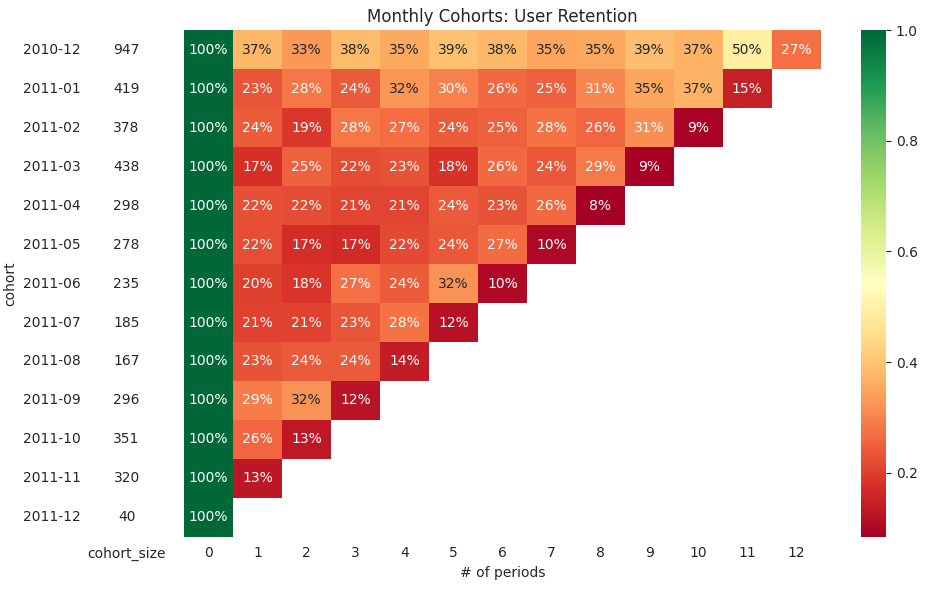

In [9]:
# Visualize Monthly Cohorts User Retention

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=12)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

### Conclusion from Cohort Analysis:

1. There is a sharp drop in the second month of (indexed as 1), where on average around 80% of the customers did not make any purchase in the second month.
2. The first cohort(2010-12) maintained 50% of its customer after a year compared to around 30% from the rest of the cohort. This could suggest the 'dedicated' customers who first joined with a connection with the retailers already. However based on the data alone, it is difficult to accurately explain the outcome.
3. As the data only accounts until 9-12-2011, there is a large drop in customer retention in period no. 12.
4. There is a fluctuations in retention over time which might be caused by the characteristics of the business, where customers purchases periodically followed by periods of inactivity.

### RFM Analysis

In [10]:
# Load the data from local folder, saved after performing data cleaning steps

online_trans_cleaned_rfm = pd.read_pickle('../data/online_trans_cleaned_rfm.pkl')
online_trans_cleaned_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395661 entries, 0 to 404908
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   invoice            395661 non-null  object        
 1   stock_code         395661 non-null  object        
 2   description        395661 non-null  object        
 3   price              395661 non-null  float64       
 4   quantity           395661 non-null  int64         
 5   total_order_value  395661 non-null  float64       
 6   invoice_date       395661 non-null  datetime64[ns]
 7   customer_id        395661 non-null  object        
 8   country            395661 non-null  object        
 9   invoice_year       395661 non-null  int32         
 10  invoice_month      395661 non-null  int32         
 11  invoice_day        395661 non-null  int32         
 12  week_day           395661 non-null  object        
 13  period             395661 non-null  period[M]    

In [11]:
# Review dataset summary

online_trans_cleaned_rfm.describe()

,price,quantity,total_order_value,invoice_date,invoice_year,invoice_month,invoice_day
count,395661.000000,395661.000000,395661.000000,395661,395661.000000,395661.000000,395661.000000
mean,2.876731,12.353118,20.888248,2011-07-10 14:57:35.906950144,2010.934348,7.599584,15.039145
min,0.000000,-9360.000000,-6539.400000,2010-12-01 08:26:00,2010.000000,1.000000,1.000000
25%,1.250000,2.000000,4.250000,2011-04-07 09:12:00,2011.000000,5.000000,7.000000
50%,1.950000,5.000000,11.700000,2011-07-31 11:45:00,2011.000000,8.000000,15.000000
75%,3.750000,12.000000,19.500000,2011-10-20 12:31:00,2011.000000,11.000000,22.000000
max,649.500000,12540.000000,38970.000000,2011-12-09 12:50:00,2011.000000,12.000000,31.000000
std,4.162989,50.098497,95.683986,NaN,0.247673,3.417180,8.654368


#### For RFM Analysis, negative quantity and 0 price invoices has been removed from the dataset

In [12]:
# Keep only invoices with quantity > 0 and price > 0

online_trans_cleaned_rfm = online_trans_cleaned_rfm[(online_trans_cleaned_rfm['quantity'] > 0) & (online_trans_cleaned_rfm['price'] > 0)]

In [13]:
online_trans_cleaned_rfm.describe()

,price,quantity,total_order_value,invoice_date,invoice_year,invoice_month,invoice_day
count,389135.000000,389135.000000,389135.000000,389135,389135.000000,389135.000000,389135.000000
mean,2.858368,12.719182,21.624380,2011-07-10 22:12:39.035501568,2010.934678,7.605376,15.044779
min,0.040000,1.000000,0.060000,2010-12-01 08:26:00,2010.000000,1.000000,1.000000
25%,1.250000,2.000000,4.950000,2011-04-07 11:40:00,2011.000000,5.000000,7.000000
50%,1.950000,6.000000,11.900000,2011-07-31 13:13:00,2011.000000,8.000000,15.000000
75%,3.750000,12.000000,19.800000,2011-10-20 13:22:00,2011.000000,11.000000,22.000000
max,649.500000,4800.000000,38970.000000,2011-12-09 12:50:00,2011.000000,12.000000,31.000000
std,4.127747,42.854383,94.247851,NaN,0.247093,3.414521,8.653189


#### There is a total of 6526 invoices with quantity < 0 and price = 0 or 1.6% of the total data 

In [14]:
# Create hypothetical snapshot date to analyse the data which is a day after the last invoice date

snapshot_date = online_trans_cleaned_rfm['invoice_date'].max() + timedelta(days = 1)
print(snapshot_date)

2011-12-10 12:50:00


In [15]:
# Calculate the Recency, Frequency, Monetary values for each customer.

online_trans_cleaned_rfm['invoice_date'] = pd.to_datetime(online_trans_cleaned_rfm['invoice_date'])

rfm = online_trans_cleaned_rfm.groupby('customer_id').agg({'invoice_date': lambda date: (snapshot_date - date.max()).days,
                                      'invoice': lambda num: len(num),
                                      'total_order_value': lambda price: price.sum()}, inplace = True)

# Rename columns names to rfm columns

rfm.columns=['recency', 'frequency', 'monetary'] 

rfm.columns

Index(['recency', 'frequency', 'monetary'], dtype='object')

In [16]:
# Review rfm values

rfm

,recency,frequency,monetary
customer_id,,,
u12347,2,182,4310.00
u12348,75,27,1437.24
u12349,19,72,1457.55
u1235,310,16,294.40
u12352,36,77,1385.74
...,...,...,...
u1828,278,10,180.60
u18281,181,7,80.82
u18282,8,12,178.05


In [17]:
# Review rfm summary

rfm.describe()

,recency,frequency,monetary
count,4322.000000,4322.000000,4322.000000
mean,92.757057,90.035863,1946.969739
std,100.268855,224.123083,8415.708828
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,301.790000
50%,51.000000,41.000000,656.925000
75%,143.000000,98.000000,1620.992500
max,374.000000,7650.000000,279138.020000


In [18]:
# Converts 'recency' and 'frequency' columns in dataframe to an integer data type using 'astype'

rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)

In [19]:
# Calculate recency quartiles
# A reversed range is used for recency as the lower the recency is, the more recent the customer placed its order

recency_quartiles = pd.qcut(rfm['recency'], q=4, labels = range(4, 0, -1)) 
rfm['R'] = recency_quartiles

# Calculate frequency quartiles

frequency_quartiles = pd.qcut(rfm['frequency'], q=4, labels = range(1, 5))
rfm['F'] = frequency_quartiles

# Calculate monetary value quartiles

monetary_quartiles = pd.qcut(rfm['monetary'], q=4, labels = range(1, 5))
rfm['M'] = monetary_quartiles

rfm.sort_values('recency')

,recency,frequency,monetary,R,F,M
customer_id,,,,,,
u13269,1,315,5343.28,4,4,4
u14606,1,2659,11883.27,4,4,4
u1368,1,173,2199.01,4,4,4
u14621,1,92,1788.36,4,3,4
u13426,1,157,3641.32,4,4,4
...,...,...,...,...,...,...
u14729,374,71,313.49,1,3,2
u12791,374,1,177.60,1,1,1
u17968,374,81,265.10,1,3,1


In [20]:
# Build RFM segments 

cols = ['R', 'F', 'M']
rfm['rfm_segment'] = rfm[cols].astype(str).apply(''.join, axis=1)

# Calculate RFM scores

rfm['rfm_score'] = rfm[cols].sum(axis=1)

rfm

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score
customer_id,,,,,,,,
u12347,2,182,4310.00,4,4,4,444,12
u12348,75,27,1437.24,2,2,3,223,7
u12349,19,72,1457.55,3,3,3,333,9
u1235,310,16,294.40,1,1,1,111,3
u12352,36,77,1385.74,3,3,3,333,9
...,...,...,...,...,...,...,...,...
u1828,278,10,180.60,1,1,1,111,3
u18281,181,7,80.82,1,1,1,111,3
u18282,8,12,178.05,4,1,1,411,6


In [21]:
# Calculate average values for each rfm_score, and return a size of each segment 

rfm_score_agg = rfm.groupby('rfm_score').agg({
                'recency': 'mean',
                'frequency': 'mean',
                'monetary': ['mean', 'count']   	# Return the size of each segment
}).round(1)

# Show the aggregated dataset

rfm_score_agg

recency frequency monetary      
             mean      mean     mean count
rfm_score                                 
3           262.3       8.3    155.8   391
4           173.9      13.6    238.8   381
5           153.1      21.0    357.7   514
6            96.4      27.4    656.3   454
7            80.3      38.6    731.1   453
8            63.0      54.9    957.1   462
9            46.0      78.2   1374.8   412
10           32.8     112.4   2005.1   420
11           21.2     183.0   3941.0   386
12            7.3     366.5   9082.3   449

In [22]:
# Define rfm_level function

def rfm_level(df):
    if df['rfm_score'] >= 12:
        return 'Top customers'
    elif ((df['rfm_score'] >= 9) and (df['rfm_score'] < 12)):
        return 'Active customers'
    elif ((df['rfm_score'] >= 6) and (df['rfm_score'] < 19)):
        return 'Unsteady customers'
    elif ((df['rfm_score'] >= 4) and (df['rfm_score'] < 6)):
        return 'At risk customers'
    else:
        return 'Inactive customers'

# Create a new variable cust_segment

rfm['cust_segment'] = rfm.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console

rfm.head()

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,cust_segment
customer_id,,,,,,,,,
u12347,2,182,4310.00,4,4,4,444,12,Top customers
u12348,75,27,1437.24,2,2,3,223,7,Unsteady customers
u12349,19,72,1457.55,3,3,3,333,9,Active customers
u1235,310,16,294.40,1,1,1,111,3,Inactive customers
u12352,36,77,1385.74,3,3,3,333,9,Active customers


In [23]:
# Calculate summary metrics per customer segment

segment = rfm.groupby('cust_segment').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean', 'count']
}).round(1)

segment.sort_values(by=('recency', 'mean'))

recency frequency monetary      
                      mean      mean     mean count
cust_segment                                       
Top customers          7.3     366.5   9082.3   449
Active customers      33.6     123.2   2405.4  1218
Unsteady customers    79.8      40.4    782.5  1369
At risk customers    161.9      17.9    307.1   895
Inactive customers   262.3       8.3    155.8   391

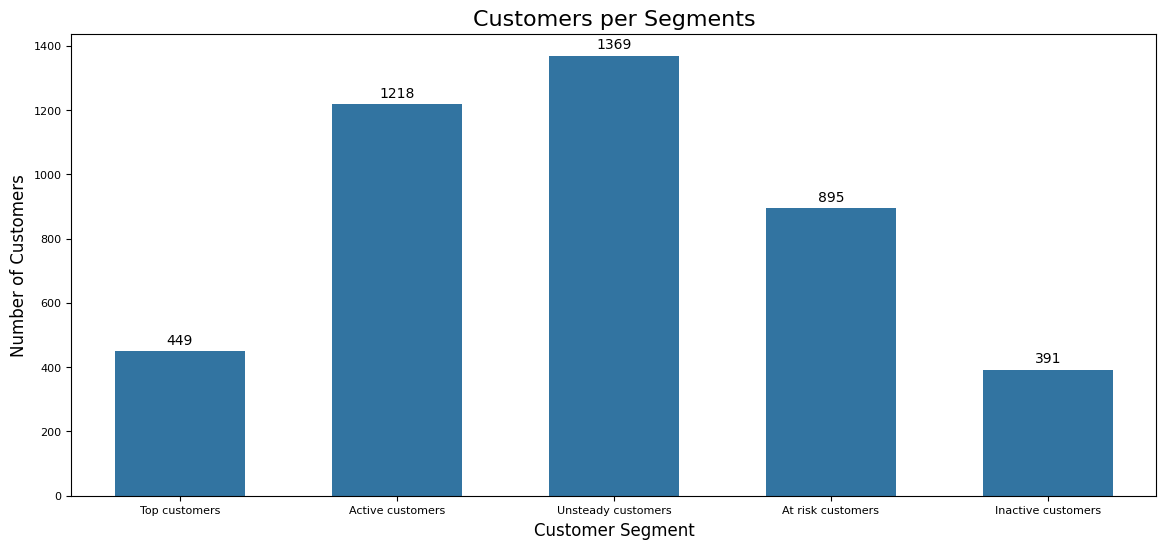

In [24]:
# Visualize customers per customer segment

rfm_cust = rfm.reset_index()

customer_segment = rfm_cust.groupby(['cust_segment'])['customer_id'].nunique()

plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[0]
cat_order = ['Top customers', 'Active customers', 'Unsteady customers', 'At risk customers', 'Inactive customers']

ax = sns.barplot(x = customer_segment.index, y = customer_segment.values, color = base_color, order = cat_order, width = 0.6)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Customers per Segments', size=16)
plt.xlabel('Customer Segment', size = 12)
plt.ylabel('Number of Customers', size = 12)

plt.show();

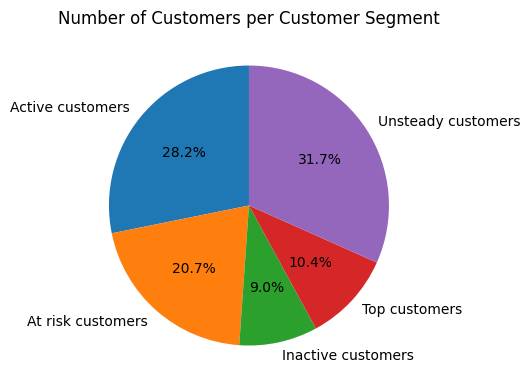

In [25]:
# Visualize total percentage of customer segment

customer_segment = rfm_cust.groupby(['cust_segment'])['customer_id'].nunique()

labels = ['Top customers', 'Active customers', 'Unsteady customers', 'At risk customers', 'Inactive customers']

customer_segment.plot(kind = 'pie', labels = customer_segment.index, autopct = '%1.1f%%', figsize = (8, 4), startangle = 90)
plt.axis('square')
plt.title ('Number of Customers per Customer Segment', pad = 20)
plt.ylabel('')
plt.show()

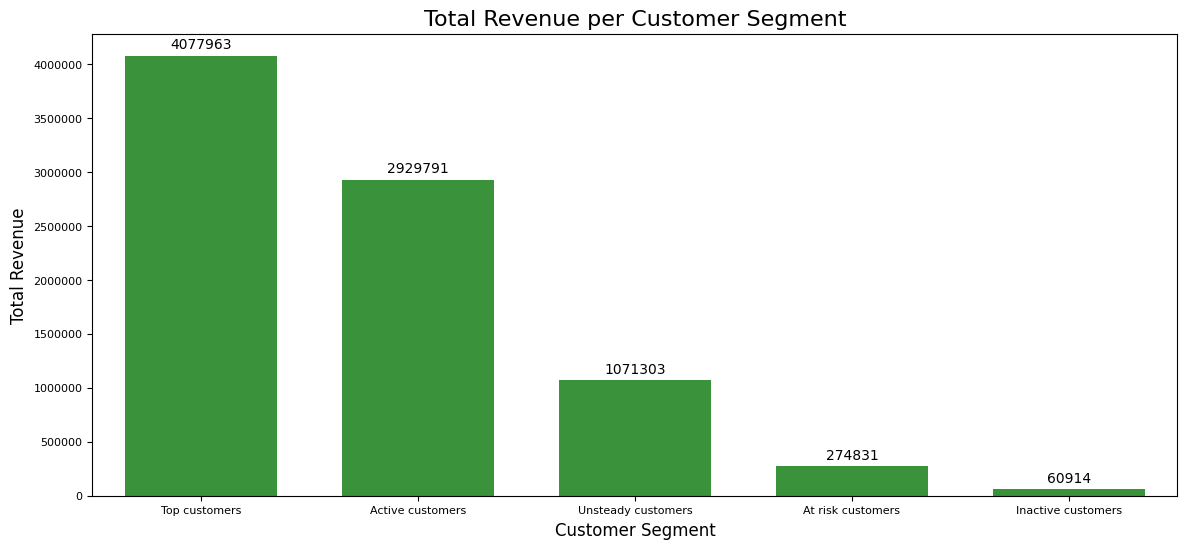

In [26]:
# Visualize the total_revenue generated by customer segment

rev_segment = rfm_cust.groupby(['cust_segment'])['monetary'].sum()

plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[2]

# Order to plot the categorical variables in
order = ['Top customers', 'Active customers', 'Unsteady customers', 'At risk customers', 'Inactive customers']

ax = sns.barplot(x = rev_segment.index, y = rev_segment.values, color = base_color, order = order, width = 0.7)
ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation)

plt.title('Total Revenue per Customer Segment', size = 16)
plt.xlabel('Customer Segment', size = 12)
plt.ylabel('Total Revenue', size = 12)
yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000]
ax.set_yticklabels(yticks)
plt.show;

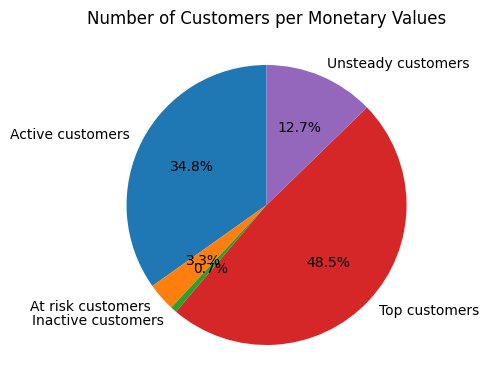

In [27]:
rev_segment = rfm_cust.groupby(['cust_segment'])['monetary'].sum()

labels = ['Top customers', 'Active customers', 'Unsteady customers', 'At risk customers', 'Inactive customers']

rev_segment.plot(kind = 'pie', labels = rev_segment.index, autopct = '%1.1f%%', figsize = (8, 4), startangle = 90)
plt.axis('square')
plt.title ('Number of Customers per Monetary Values', pad = 20)
plt.ylabel('')
plt.show()

#### Conclusion for RFM Analysis

Customers can be grouped into 5 different segments based on the rfm_score
1. Top customers (10.4%) - Customers whose average last purchase within the last week, with 48.5% of total revenue
2. Active customers (28.2%) - Customers whose average last purchase within the last month with 34.8% of total revenue
3. Unsteady customers (31.7%) - Customers whose average last purchase within the last 3 months with 12.7% of total revenue
4. At risk customers (20.7%) - Customers whose average last purchase within the last 6 months with 3.3% of total revenue
5. Inactive customers (9.0%) - Customers whose average last purchase within the last 9 months with 0.7% of total revenue

* Results show that the top 38% of customers generated 83% of the total revenue, 32% of middle tier customer generated 13% of revenue, while the bottom 30% of customers generated 4% of total revenue

### Data Preprocessing for Clustering

In [29]:
rfm.head()

,recency,frequency,monetary,R,F,M,rfm_segment,rfm_score,cust_segment
customer_id,,,,,,,,,
u12347,2,182,4310.00,4,4,4,444,12,Top customers
u12348,75,27,1437.24,2,2,3,223,7,Unsteady customers
u12349,19,72,1457.55,3,3,3,333,9,Active customers
u1235,310,16,294.40,1,1,1,111,3,Inactive customers
u12352,36,77,1385.74,3,3,3,333,9,Active customers


In [30]:
# Reset index of rfm_km

rfm_km = rfm[['recency', 'frequency', 'monetary']]
rfm_km.reset_index(drop= True, inplace = True)
rfm_km

,recency,frequency,monetary
0,2,182,4310.00
1,75,27,1437.24
2,19,72,1457.55
3,310,16,294.40
4,36,77,1385.74
...,...,...,...
4317,278,10,180.60
4318,181,7,80.82
4319,8,12,178.05
4320,4,719,2039.58


In [31]:
rfm_km.describe()

,recency,frequency,monetary
count,4322.000000,4322.000000,4322.000000
mean,92.757057,90.035863,1946.969739
std,100.268855,224.123083,8415.708828
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,301.790000
50%,51.000000,41.000000,656.925000
75%,143.000000,98.000000,1620.992500
max,374.000000,7650.000000,279138.020000


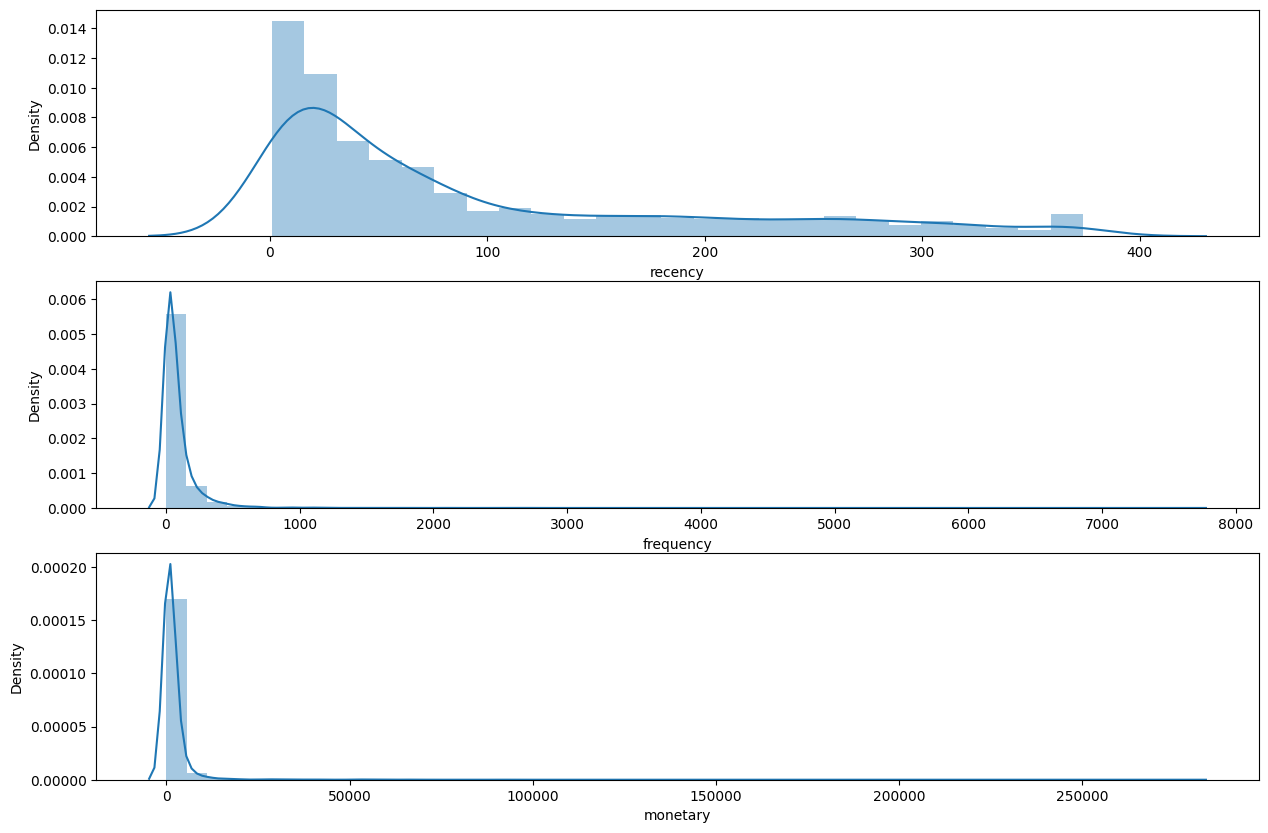

In [32]:
# Plot RFM distributions
plt.figure(figsize=[15,10])

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_km['recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_km['frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_km['monetary'])

# Show the plot
plt.show()

The distribution of recency, frequency and monetary metrics are all right skewed

In [33]:
# Unskew and review the summary of the data
rfm_km_log = np.log(rfm_km)
rfm_km_log.describe()

,recency,frequency,monetary
count,4322.000000,4322.000000,4322.000000
mean,3.769123,3.664938,6.562537
std,1.432917,1.322144,1.255250
min,0.000000,0.000000,1.064711
25%,2.890372,2.833213,5.709731
50%,3.931826,3.713572,6.487570
75%,4.962845,4.584967,7.390794
max,5.924256,8.942461,12.539462


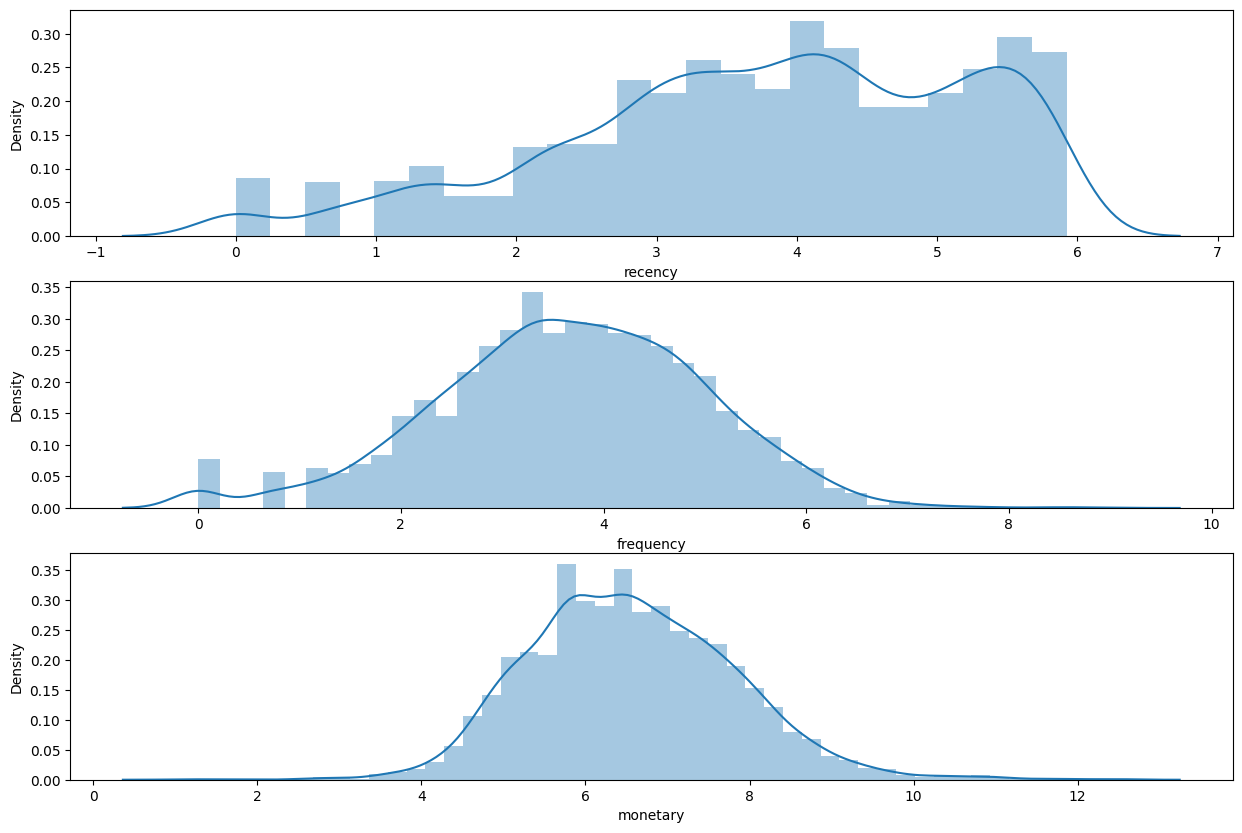

In [34]:
# Visualize transfomed rfm_log distributions
plt.figure(figsize=[15,10])

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_km_log['recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_km_log['frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_km_log['monetary'])

# Show the plot
plt.show()

In [35]:
# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(rfm_km_log)

# Scale and center the data
rfm_km_normalized = scaler.transform(rfm_km_log)

# Create a pandas DataFrame
rfm_km_normalized = pd.DataFrame(data=rfm_km_normalized, index=rfm_km_log.index, columns=rfm_km_log.columns)

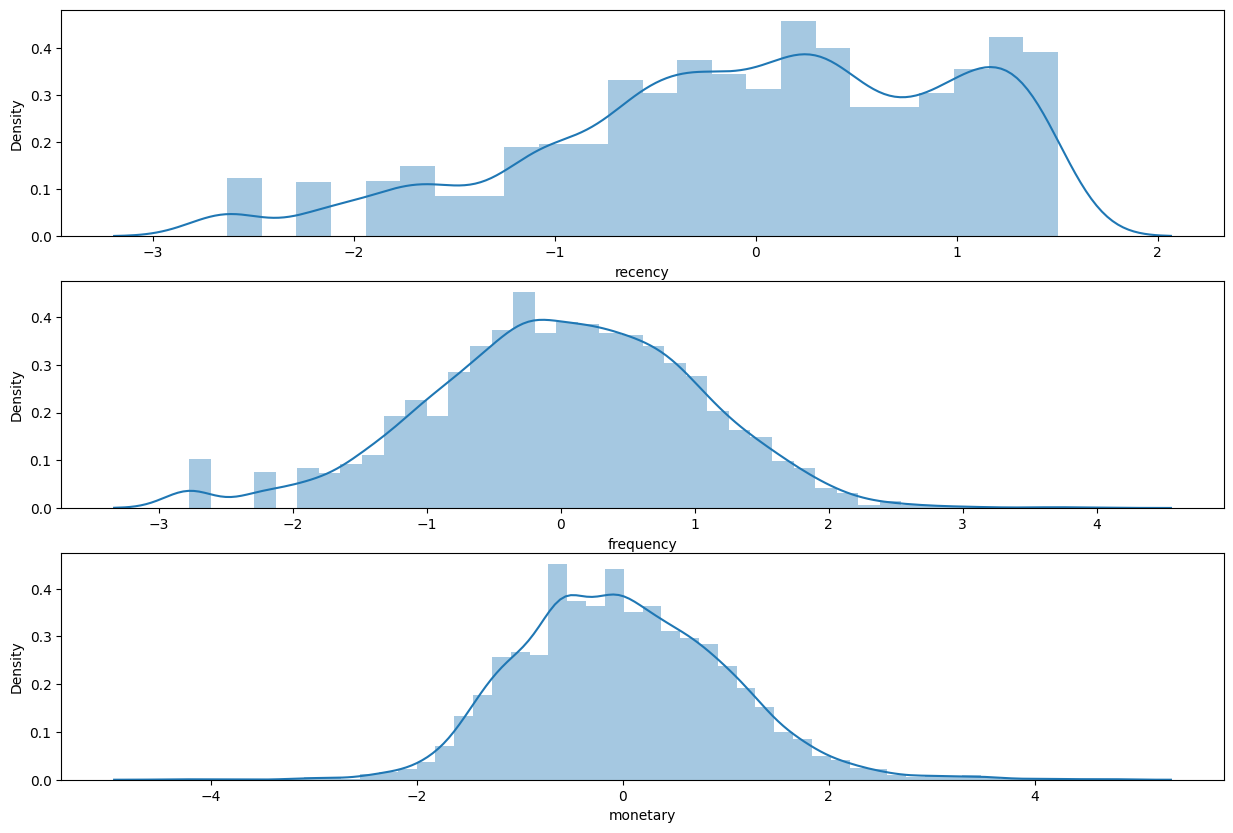

In [36]:
# Visualize normalized data

plt.figure(figsize=[15,10])

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(rfm_km_normalized['recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(rfm_km_normalized['frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(rfm_km_normalized['monetary'])

# Show the plot
plt.show()

In [37]:
# Review normalized data summary

rfm_km_normalized.describe().round(2)

,recency,frequency,monetary
count,4322.00,4322.00,4322.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.63,-2.77,-4.38
25%,-0.61,-0.63,-0.68
50%,0.11,0.04,-0.06
75%,0.83,0.70,0.66
max,1.50,3.99,4.76


Variable has now an average value of 0 and standard deviation of 1 after normalization of the data

### Elbow criterion method

1. Elbow criterion method will be used to choose the number of clusters for K-Mean Analysis 
2. This method plot the sum of squared distances(SSE - sum of squared errors) from every data point to their cluster center 
3. Then an 'elbow'(optimal point) is identify in the plot to determine the number of clusters

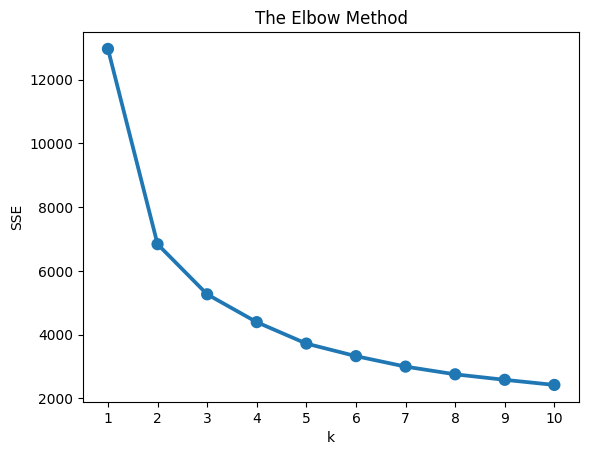

In [38]:
# Fit KMeans and calculate sum of squared errors for each k

# empty dictionary for sum squared of errors
sse = {} 

# run for loop over different number of clusters between 1 and 10 to build kmeans segmentation on rfm_km_normalized
for k in range(1, 11): 
    
    #initialize K-means with k clusters and fit it
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_km_normalized)
    
    # assign sum of squared distance to k element of the sse dictionary
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

# plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show();

From the Elbow criterion method, 'elbow point' is determined at 2, 3 or 4 clusters, hence the following K-means analysis are performed

### Customer Segmentation with K-means

In [39]:
# Initialize KMeans for 2 clusters
kmeans = KMeans(n_clusters=2, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(rfm_km_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
rfm_k2 = rfm_km.assign(cluster=cluster_labels)

# Group the data by cluster
grouped = rfm_k2.groupby(['cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
  }).round(1)

recency frequency monetary      
           mean      mean     mean count
cluster                                 
0         142.1      24.4    428.7  2395
1          31.4     171.6   3834.0  1927

In [40]:
# Initialize KMeans for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(rfm_km_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
rfm_k3 = rfm_km.assign(cluster=cluster_labels)

# Group the data by cluster
grouped = rfm_k3.groupby(['cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
  }).round(1).sort_values(by = ('recency', 'mean'))

recency frequency monetary      
           mean      mean     mean count
cluster                                 
1          13.1     258.9   6247.8   950
2          69.3      65.3   1105.7  1849
0         170.8      14.7    285.5  1523

In [41]:
# Initialize KMeans for 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(rfm_km_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
rfm_k4 = rfm_km.assign(cluster=cluster_labels)

# Group the data by cluster
grouped = rfm_k4.groupby(['cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
  }).round(1).sort_values(by = ('recency', 'mean'))

recency frequency monetary      
           mean      mean     mean count
cluster                                 
2          12.0     281.0   6826.0   834
0          19.9      37.8    576.5   832
3          93.6      80.5   1439.2  1283
1         185.2      14.6    288.2  1373

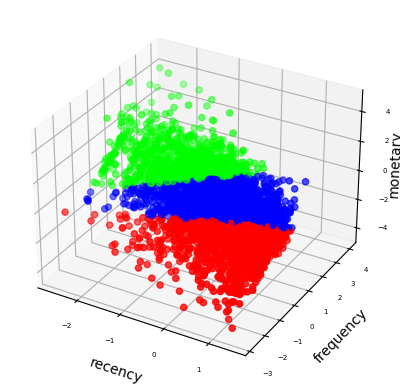

In [42]:
# Visualizing all the clusters

model = KMeans(n_clusters= 3, n_init='auto', random_state=1231).fit(rfm_km_normalized)
centers = model.cluster_centers_

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.scatter(rfm_km_normalized["recency"], rfm_km_normalized["frequency"], rfm_km_normalized["monetary"], 
           cmap= "brg", 
           c=model.predict(rfm_km_normalized))
ax.scatter(centers[:,0], centers[:,1], c="black")
ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_title('')
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary', labelpad=-5);

#### Conclusion from KMean Analysis

Based on KMean Analysis, the customers from this dataset can be segmented into 3 clusters:

1. top tier customer - Recent purchase, high no of invoices and highest revenue
2. medium tier customer - Average of purchase the last 2 months, lower no of invoices and revenue
3. low tier customer - 6 months since the last purchase and minimal no of invoices and revenue which could indicate random and one time purchase from the online platform